In [1]:
#import driver
from tf_agents.drivers import py_driver
from tf_agents.drivers.dynamic_episode_driver import DynamicEpisodeDriver
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

#import environment
from tf_agents.environments import py_environment
from tf_agents.environments import tf_py_environment #allows parallel computing for generating experiences
from tf_agents.environments.parallel_py_environment import ParallelPyEnvironment

#import replay buffer
from tf_agents import replay_buffers as rb

#import agent
from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.utils import value_ops
from tf_agents.trajectories import StepType


#other used packages
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.axes import Axes as ax
import numpy as np
import tensorflow as tf
import tf_agents
from tf_agents.networks import actor_distribution_network
from tf_agents.specs import array_spec
from tf_agents.utils import common
from tf_agents.trajectories import time_step as ts
from tf_agents.networks.categorical_projection_network import CategoricalProjectionNetwork
import os,gc
import pygad
from pyswarms.single.global_best import GlobalBestPSO
import time

2025-05-27 21:05:57.587458: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#To limit TensorFlow to a CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
cpus = tf.config.experimental.list_physical_devices('CPU') 
tf.config.experimental.set_visible_devices(cpus[0], 'CPU')
#enable multiprocessing for parallel computing
tf_agents.system.multiprocessing.enable_interactive_mode()
gc.collect()

195

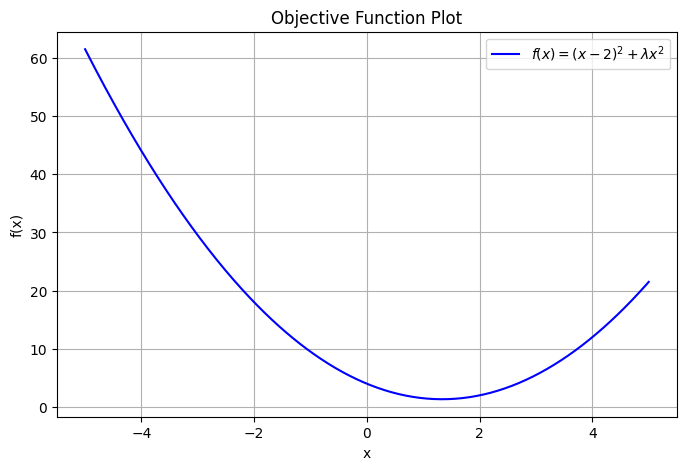

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define lambda_coef
lambda_coef = 0.5

# Define the function
def f(x):
    return (x - 2)**2 + lambda_coef * (x**2)

# Create x values
x = np.linspace(-5, 5, 400)
y = f(x)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(x, y, label=r'$f(x) = (x-2)^2 + \lambda x^2$', color='blue')
plt.title('Objective Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


In [4]:
!pip install dm-reverb==0.9.0

ERROR: Could not find a version that satisfies the requirement dm-reverb==0.9.0 (from versions: none)
ERROR: No matching distribution found for dm-reverb==0.9.0
